In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Veri yükleme
installs = pd.read_csv("../data/installs.csv")         
retention = pd.read_csv("../data/retention.csv")         
ua = pd.read_csv("../data/user_acquisition.csv") 

In [2]:
# Convert to date format
installs['install_date'] = pd.to_datetime(installs['install_date'])

## Cohort Analysis

📅 Weekly Cohort Retention Rates:
  install_week  d1_retained  d7_retained  d30_retained
0   2025-06-23     0.622222     0.244444      0.080000
1   2025-06-30     0.624490     0.261224      0.089796
2   2025-07-07     0.596491     0.307018      0.096491
3   2025-07-14     0.606695     0.280335      0.050209
4   2025-07-21     0.555556     0.365079      0.126984


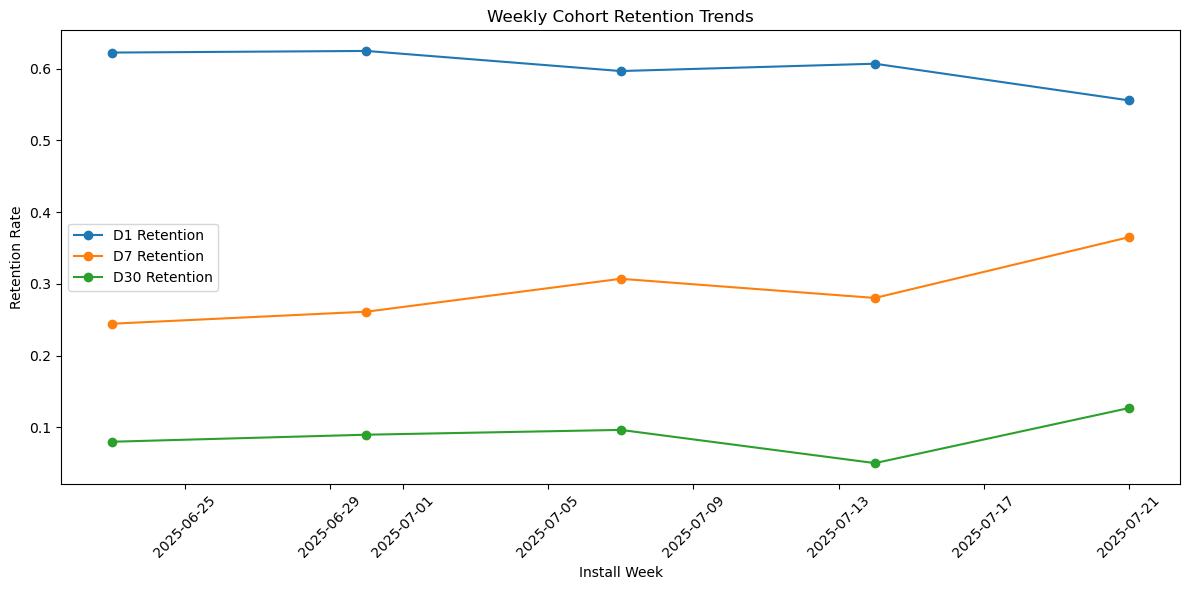

In [4]:
# Haftalık cohort oluştur (install_date haftanın Pazartesi'si olarak gruplanacak)
installs['install_week'] = installs['install_date'].dt.to_period('W').apply(lambda r: r.start_time)

# Retention verisini installs ile birleştir
user_data = installs.merge(retention, on='user_id', how='left')

# Haftalık cohort bazında D1, D7, D30 retention ortalamaları
cohort_retention = user_data.groupby('install_week').agg({
    'd1_retained': 'mean',
    'd7_retained': 'mean',
    'd30_retained': 'mean'
}).reset_index()

print("📅 Weekly Cohort Retention Rates:")
print(cohort_retention.head(10))

# Grafikle göster
plt.figure(figsize=(12,6))
plt.plot(cohort_retention['install_week'], cohort_retention['d1_retained'], marker='o', label='D1 Retention')
plt.plot(cohort_retention['install_week'], cohort_retention['d7_retained'], marker='o', label='D7 Retention')
plt.plot(cohort_retention['install_week'], cohort_retention['d30_retained'], marker='o', label='D30 Retention')
plt.title("Weekly Cohort Retention Trends")
plt.xlabel("Install Week")
plt.ylabel("Retention Rate")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Push Notification Experiment Simulation

In [6]:
# (A/B testi)
user_data['push_group'] = np.random.choice(['Control', 'Push'], size=len(user_data), p=[0.5, 0.5])

# Retention comparison for those who received push and those who did not
push_retention = user_data.groupby('push_group').agg({
    'd1_retained': 'mean',
    'd7_retained': 'mean',
    'd30_retained': 'mean'
}).reset_index()

print("\n📲 Push Notification A/B Testi Retention Results:")
print(push_retention)



📲 Push Notification A/B Testi Retention Results:
  push_group  d1_retained  d7_retained  d30_retained
0    Control     0.594320     0.273834      0.081136
1       Push     0.623274     0.284024      0.082840


## Segment-Based Action Plan

In [8]:
platforms = ua['platform'].unique()
user_data['platform'] = np.random.choice(platforms, size=len(user_data))

platform_retention = user_data.groupby('platform').agg({
    'd1_retained': 'mean',
    'd7_retained': 'mean',
    'd30_retained': 'mean'
}).reset_index()

print("\n📊 Platform-Based Retention Rates:")
print(platform_retention)

# Simple action recommendations
print("\n📌 Recommendations:")
print("- Users who received bonuses show higher retention rates; bonus campaigns can be increased.")
print("- Users who received push notifications show some improvement in retention; notification strategy should be optimized.")
print("- There are platform-based differences; special campaigns can be planned for platforms with lower retention.")



📊 Platform-Based Retention Rates:
     platform  d1_retained  d7_retained  d30_retained
0  Google UAC     0.619835     0.253444      0.074380
1        Meta     0.587692     0.276923      0.104615
2      TikTok     0.618590     0.310897      0.067308

📌 Recommendations:
- Users who received bonuses show higher retention rates; bonus campaigns can be increased.
- Users who received push notifications show some improvement in retention; notification strategy should be optimized.
- There are platform-based differences; special campaigns can be planned for platforms with lower retention.
